In [37]:
import pandas as pd 

#load the dataset
df = pd.read_csv('../data/tmdb_5000_movies.csv')

#preview the dataset 
print(df.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [38]:
#inspect the dataset in more detail
df.info() # to spot any missing values and data types

df.describe() # to get summary statistics



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [39]:
df.isnull().sum() # to count missing values in each column

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [40]:
#Handle missing data based on the analysis above (if any)

#drop rows with missing values in 'release_date' and 'runtime' if they are essential for analysis
df = df.dropna(subset=['release_date', 'runtime'])

#fill in tagline/homepage depending on context
df['tagline'] = df['tagline'].fillna('No tagline')
df['homepage'] = df['homepage'].fillna("No homepage")


#check for duplicates
df= df.drop_duplicates()






In [41]:
!pip install seaborn



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


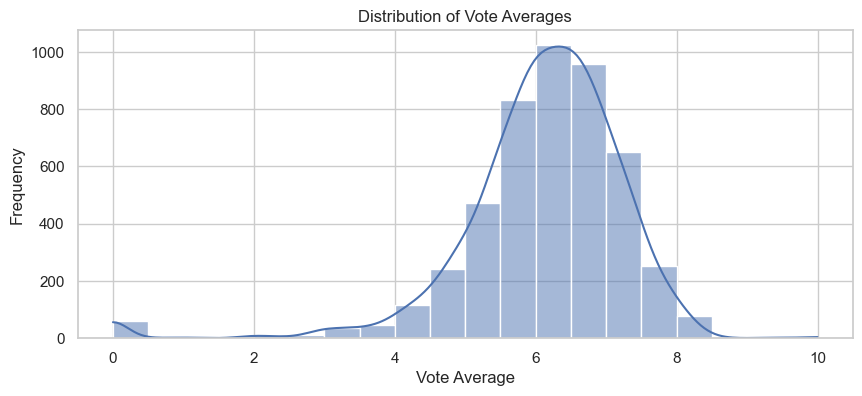

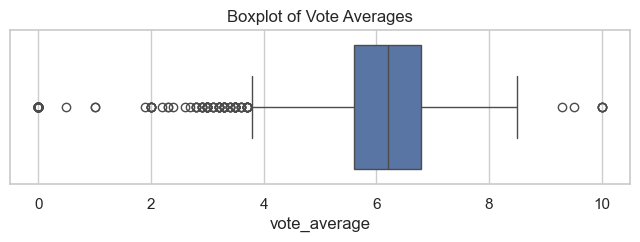

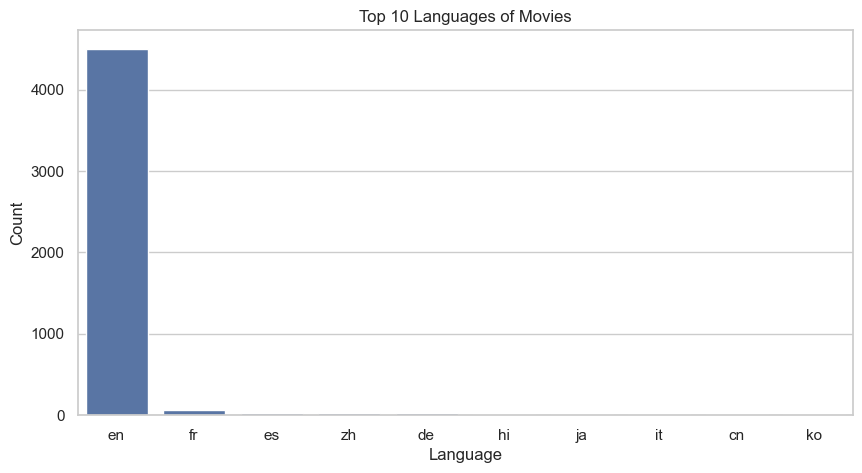

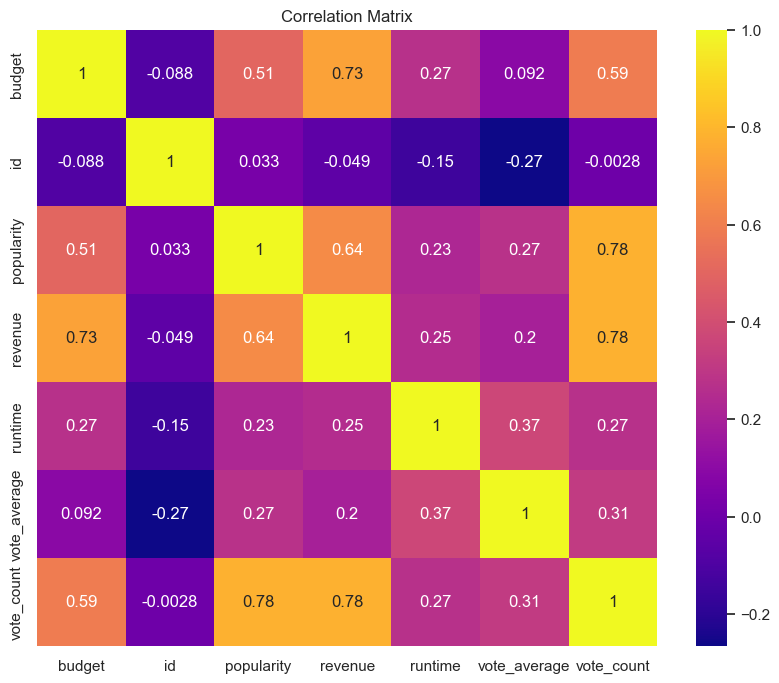

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#histogram
plt.figure(figsize=(10,4))
sns.histplot(df['vote_average'], kde=True, bins=20)
plt.title("Distribution of Vote Averages")
plt.xlabel("Vote Average")
plt.ylabel("Frequency")
plt.show()

#boxplot
plt.figure(figsize=(8,2))
sns.boxplot(x=df['vote_average'])
plt.title("Boxplot of Vote Averages")
plt.show()

top_languages = df['original_language'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_languages.index, y=top_languages.values)
plt.title('Top 10 Languages of Movies')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()


# Summary statistics
df.describe()

# Correlation matrix
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='plasma')
plt.title('Correlation Matrix')
plt.show()
